<a href="https://colab.research.google.com/github/varsha2176/Data_Science_Prodigy/blob/main/prodigy_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn graphviz pydotplus


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [4]:
from google.colab import files
uploaded = files.upload()



Saving bank.csv to bank.csv
Saving bank-full.csv to bank-full.csv
Saving bank-names.txt to bank-names.txt


In [5]:
import pandas as pd

df = pd.read_csv("bank.csv", sep=",")  # Ensure correct separator
print("Dataset Loaded Successfully!")
df.head()  # Display first 5 rows


Dataset Loaded Successfully!


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [6]:
print("Missing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns  # Find categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical Variables Encoded Successfully!")
df.head()


Categorical Variables Encoded Successfully!


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,625
1,1193
2,1572
3,536
4,4287


In [9]:
# Reload the dataset with the correct separator
import pandas as pd

df = pd.read_csv("bank.csv", sep=";")  # Ensure correct separator
df.columns = df.columns.str.replace('"', '')  # Remove double quotes from column names
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
print(df.columns)  # This will show the cleaned column names


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [11]:
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target
print("Features and Target Separated Successfully!")


Features and Target Separated Successfully!


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns  # Find categorical columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Encode categorical columns

print("Categorical Variables Encoded Successfully!")
df.head()


Categorical Variables Encoded Successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split Completed!")



Data Split Completed!


In [17]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

print("Categorical Variables Encoded Successfully!")
df.head()



Categorical Variables Encoded Successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Define Features and Target
X = df.drop(columns=['y'])
y = df['y']

# Split into Training and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


In [19]:
# Predictions on Test Data
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905

Confusion Matrix:
[[779  28]
 [ 61  37]]


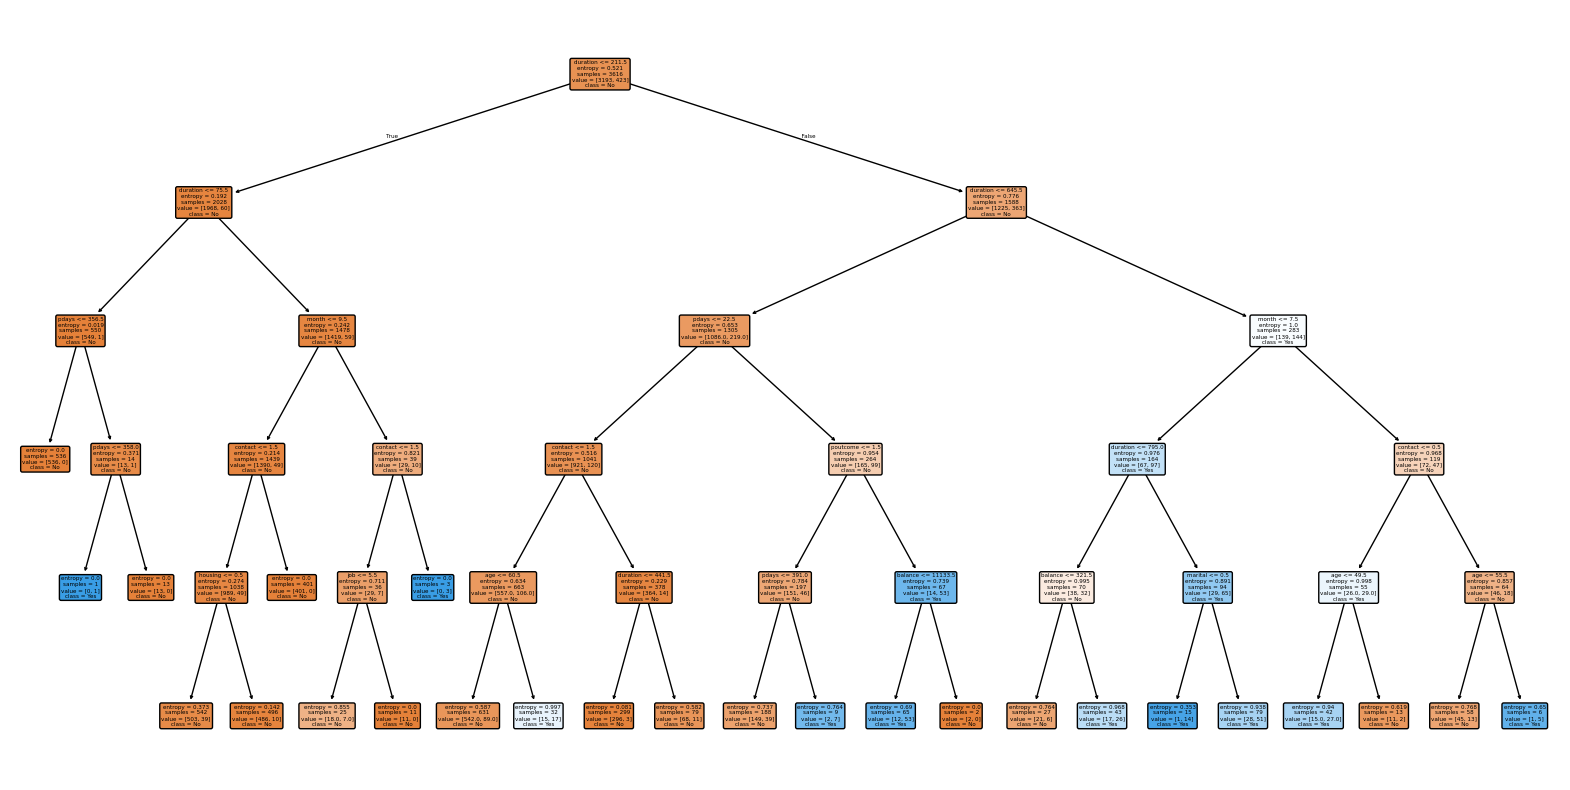

In [23]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

